In [1]:
# import necessary packages
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import geopandas as gpd
from descartes import PolygonPatch
from tqdm import tqdm

In [28]:
df = pd.read_csv("../../Raw_Data/full_df.zip").drop(columns="Unnamed: 0")

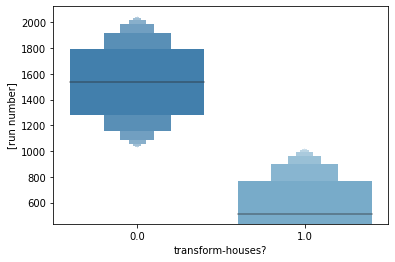

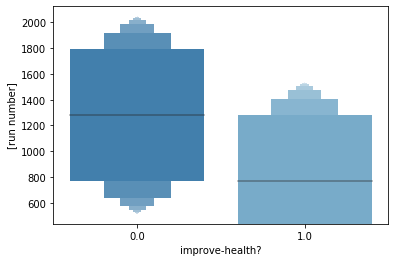

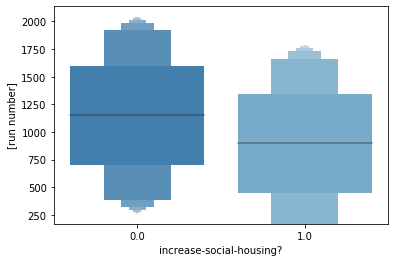

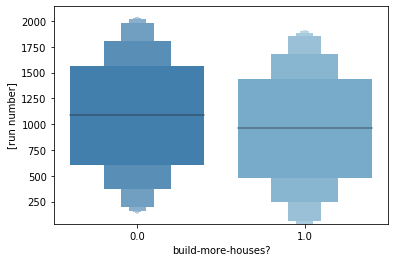

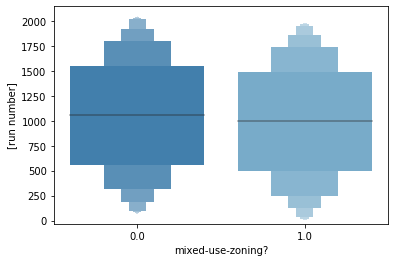

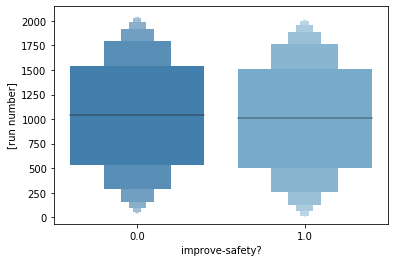

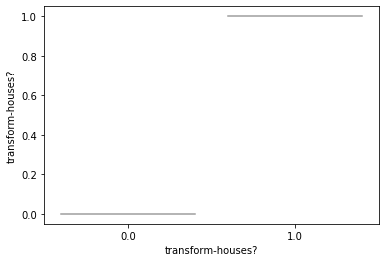

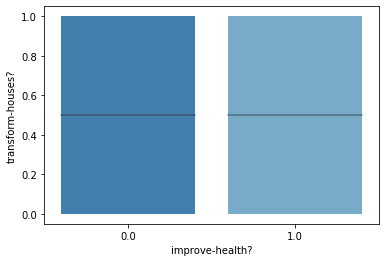

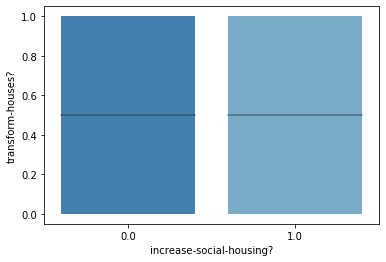

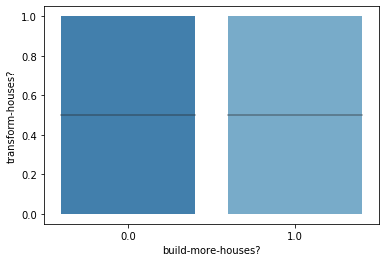

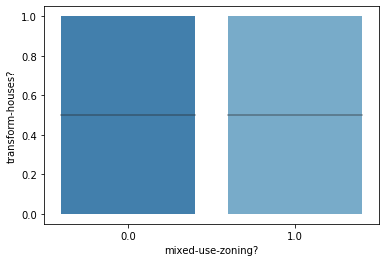

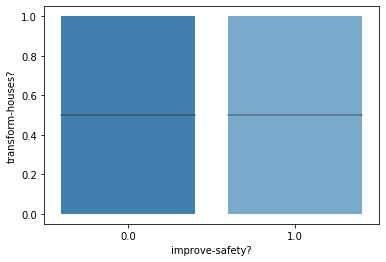

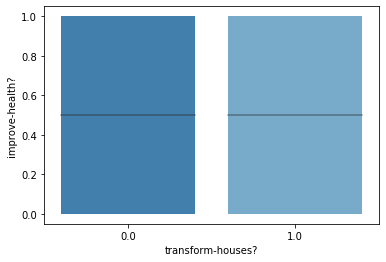

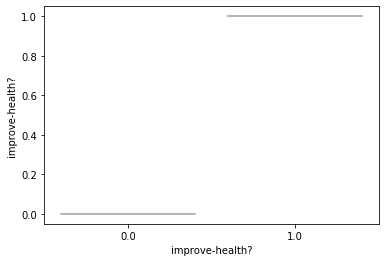

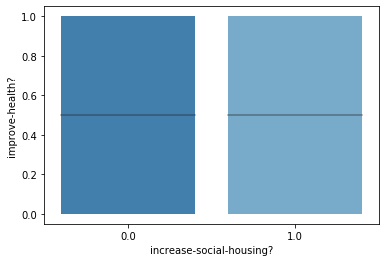

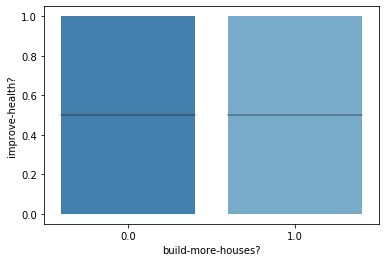

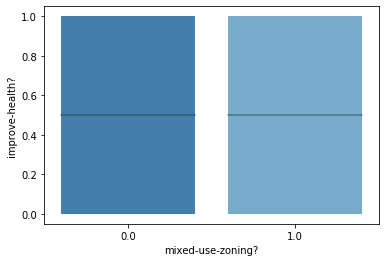

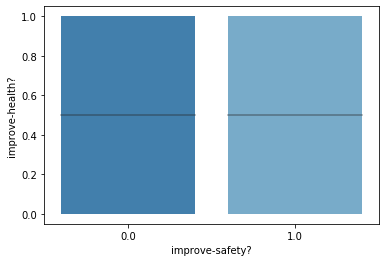

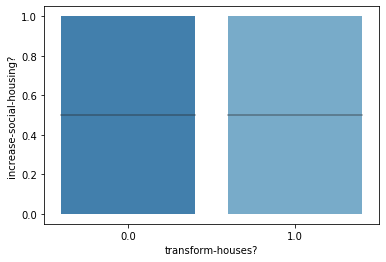

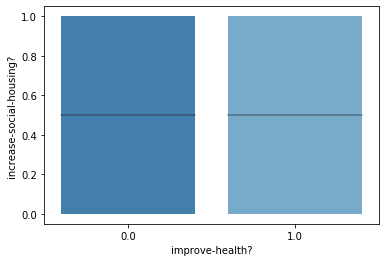

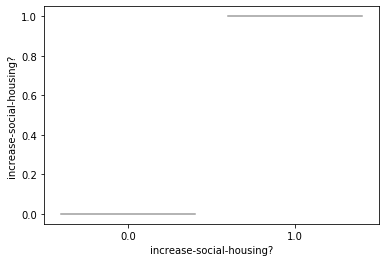

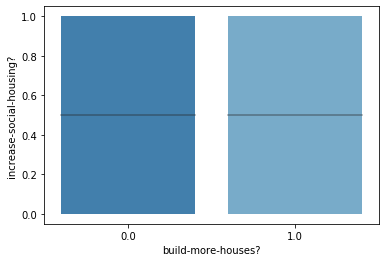

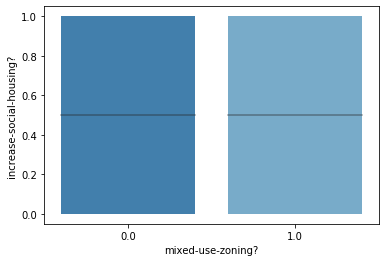

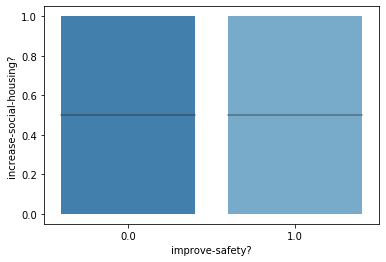

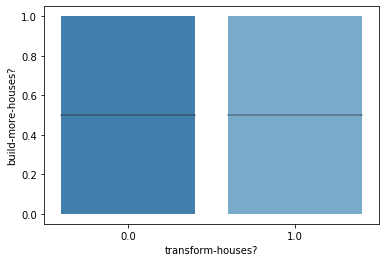

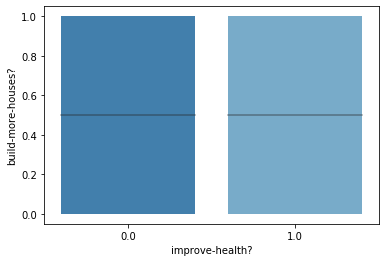

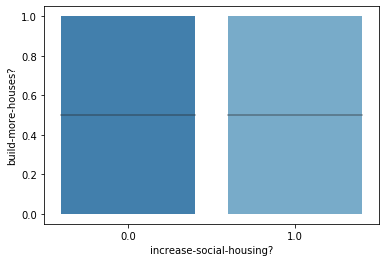

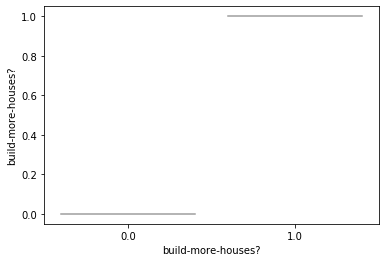

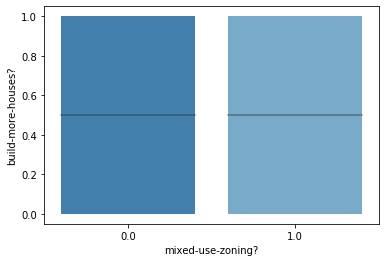

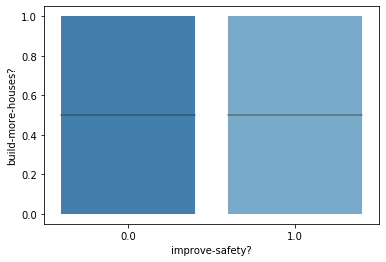

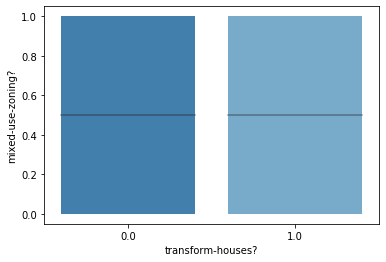

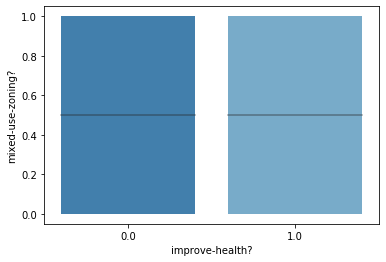

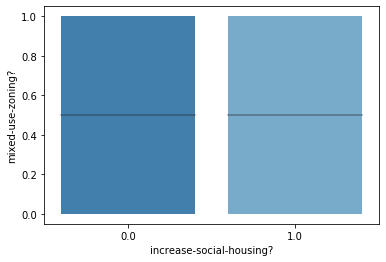

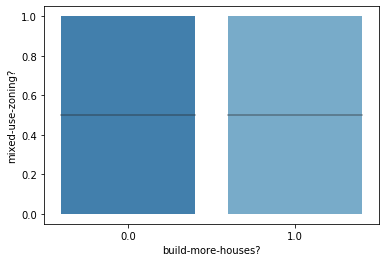

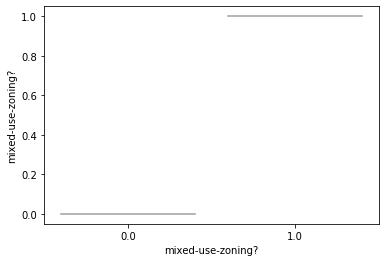

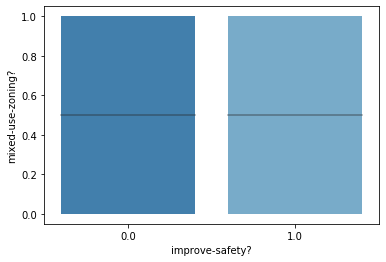

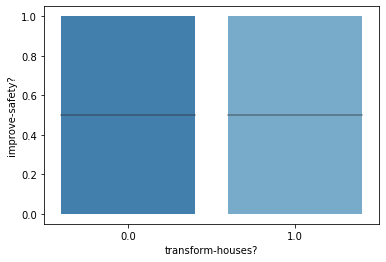

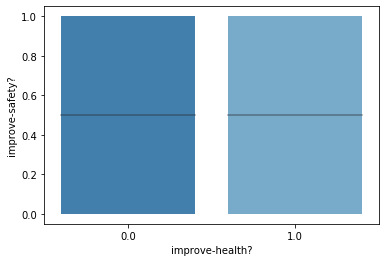

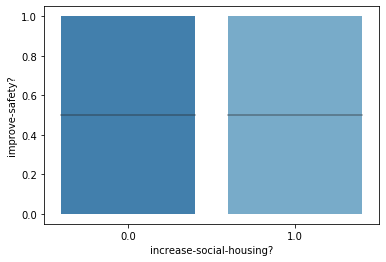

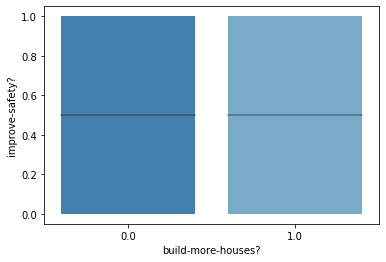

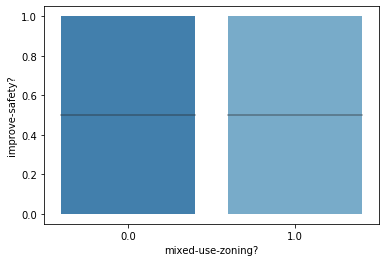

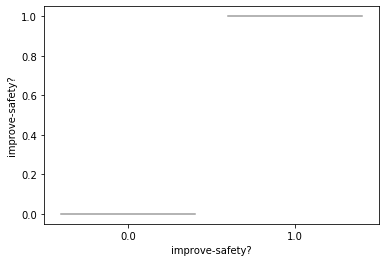

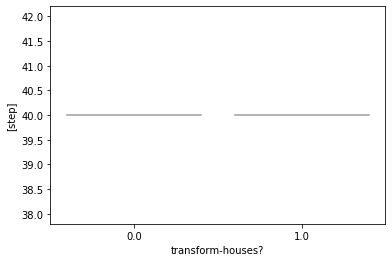

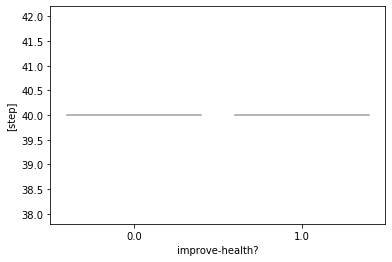

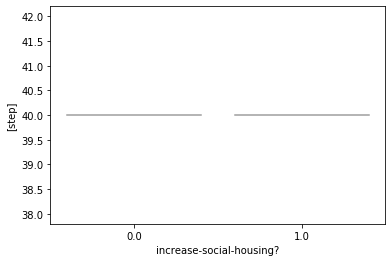

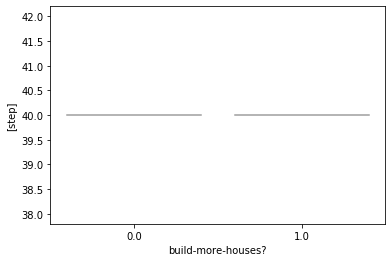

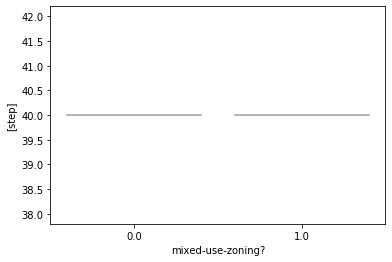

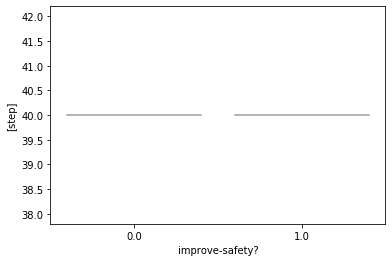

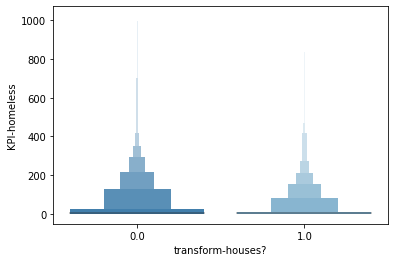

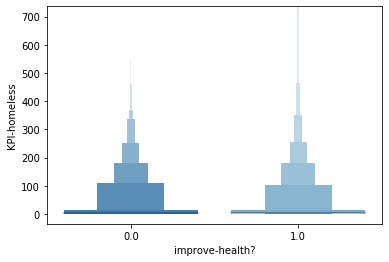

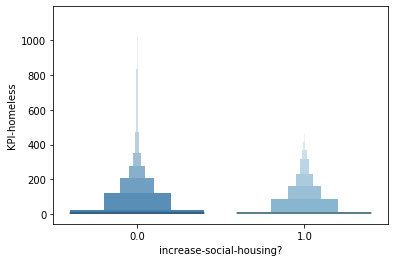

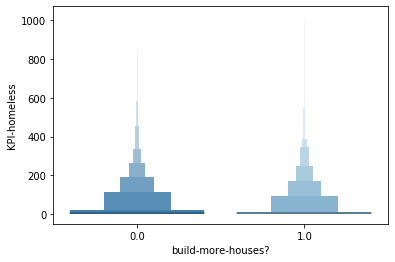

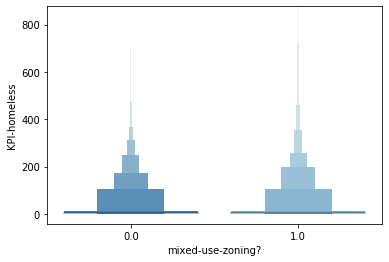

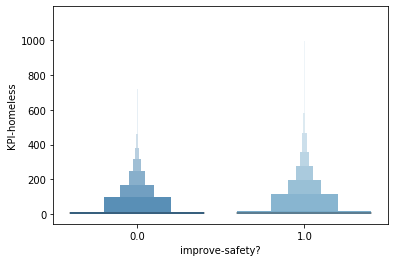

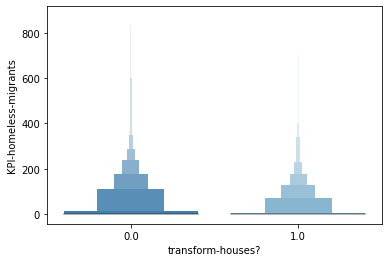

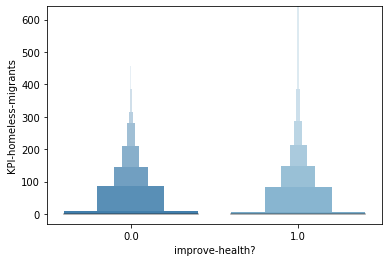

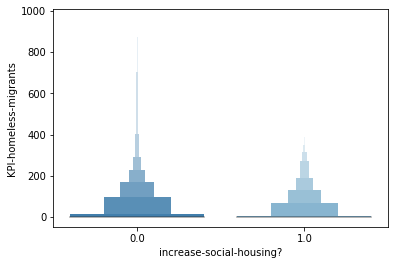

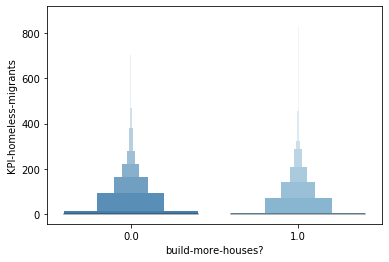

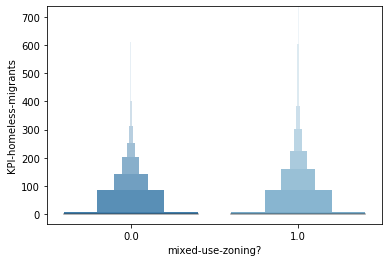

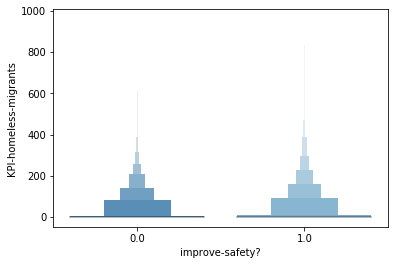

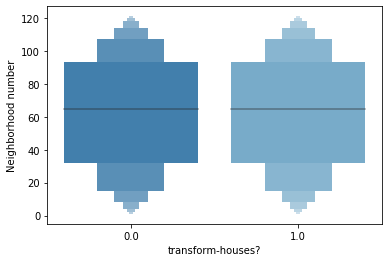

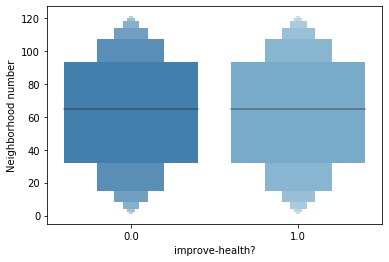

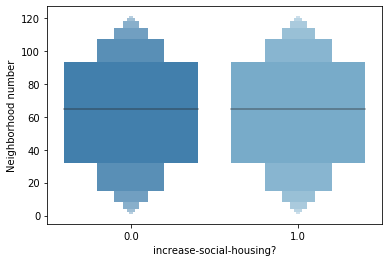

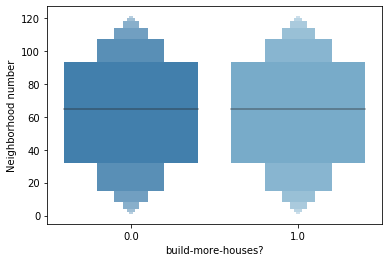

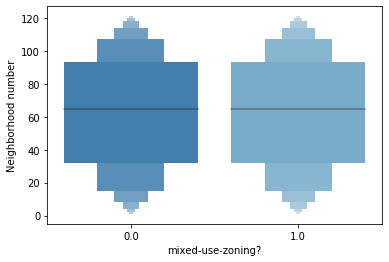

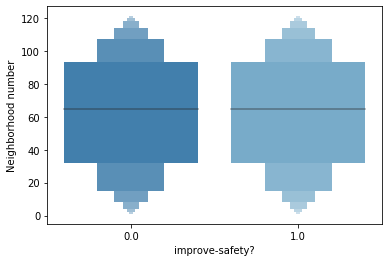

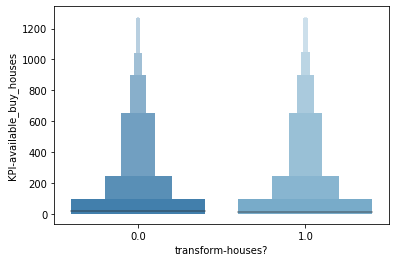

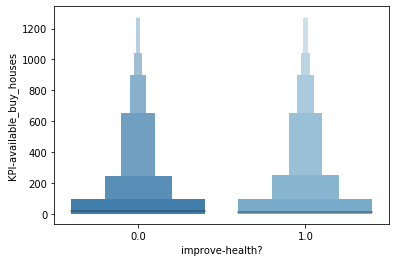

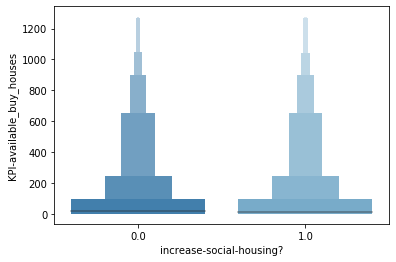

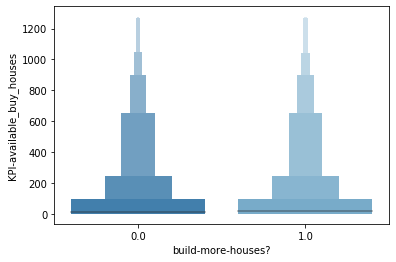

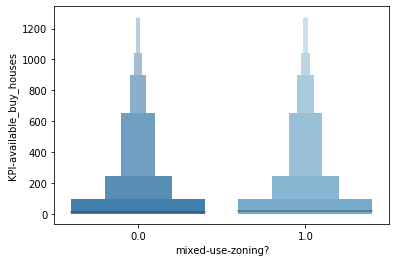

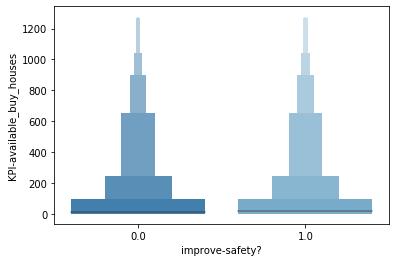

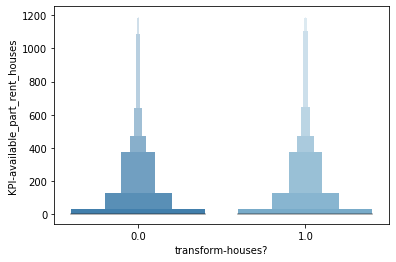

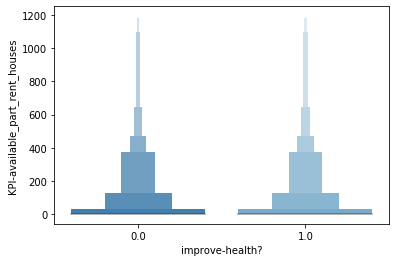

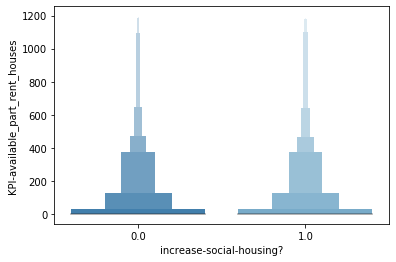

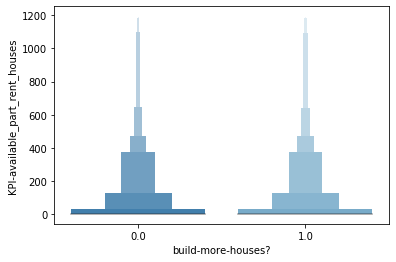

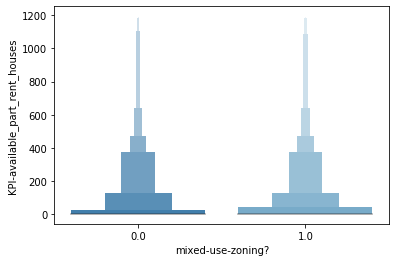

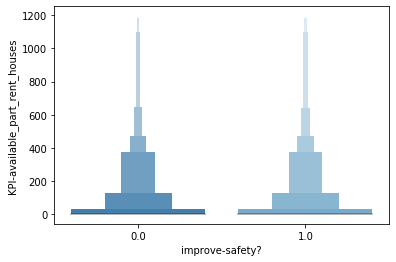

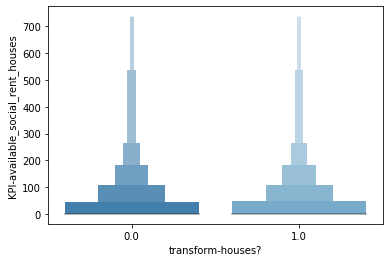

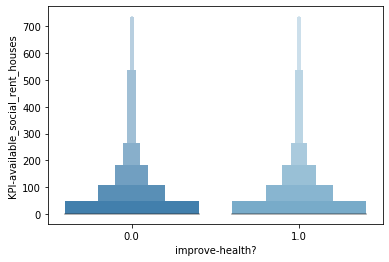

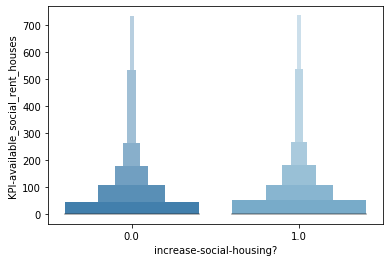

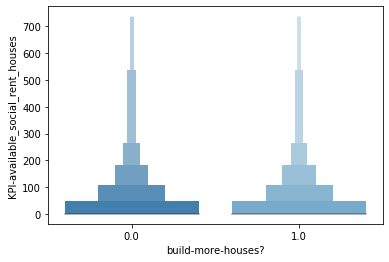

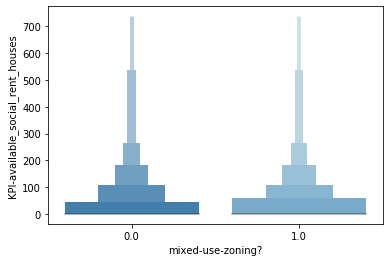

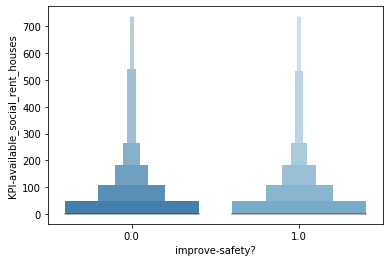

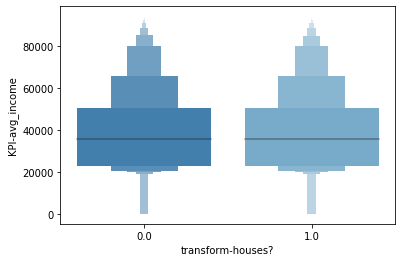

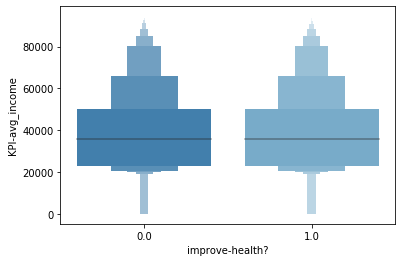

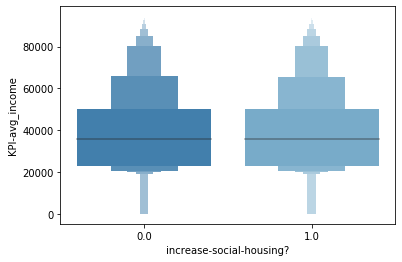

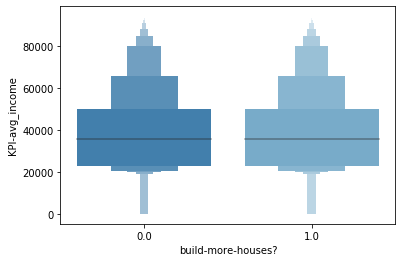

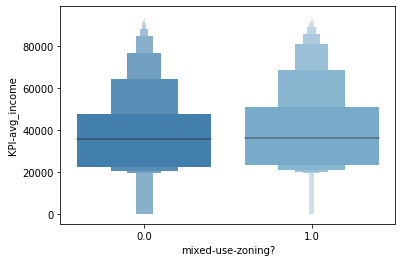

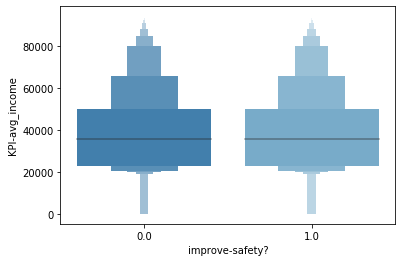

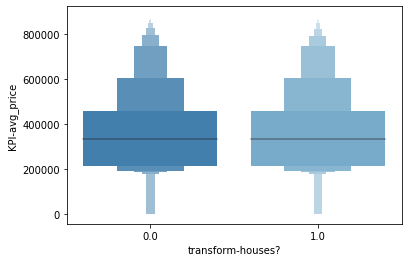

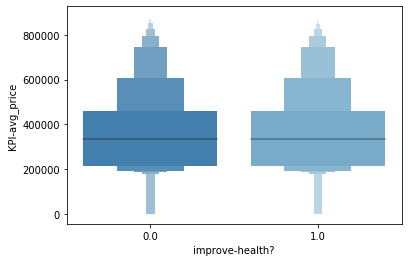

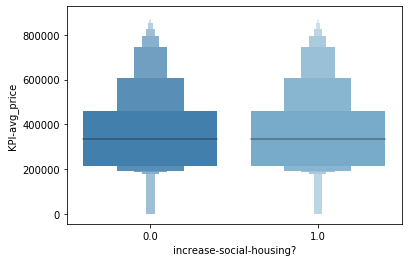

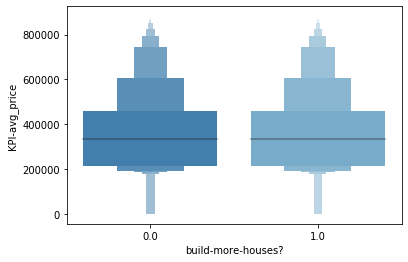

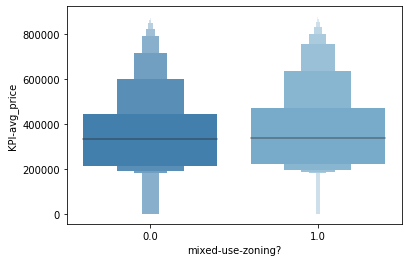

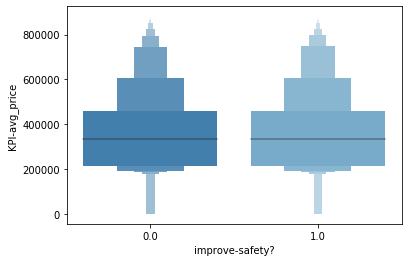

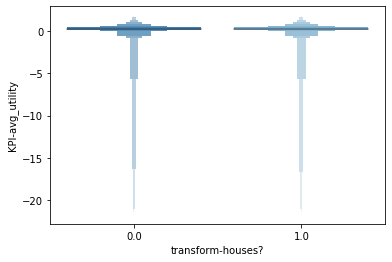

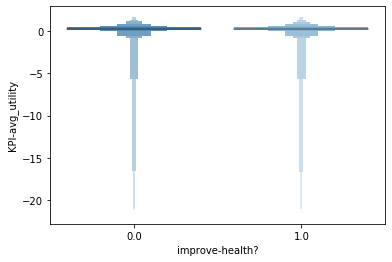

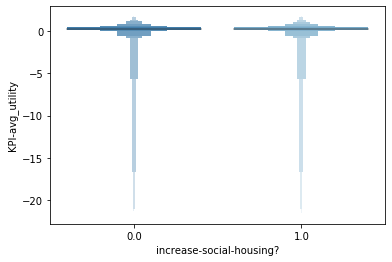

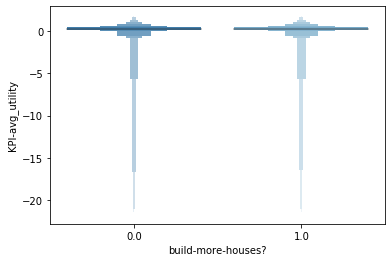

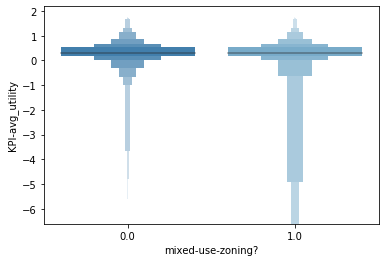

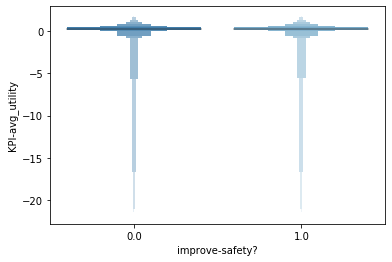

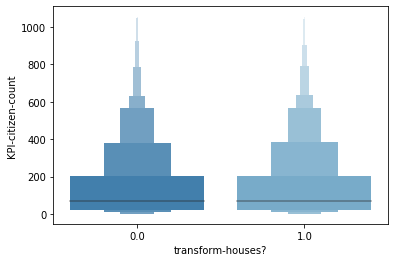

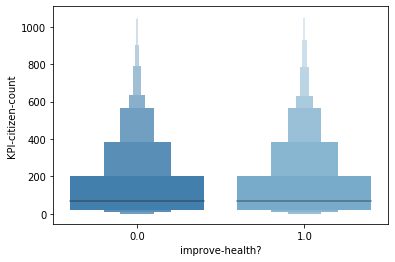

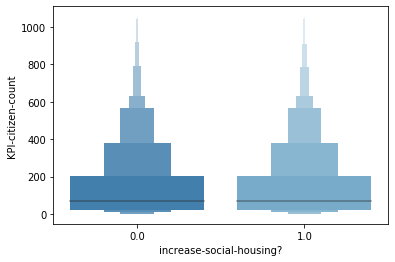

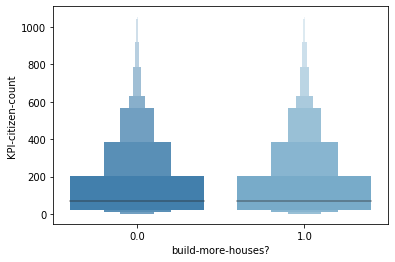

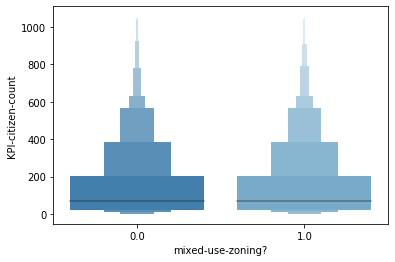

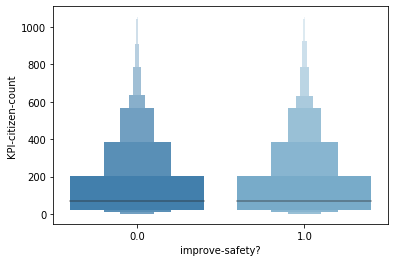

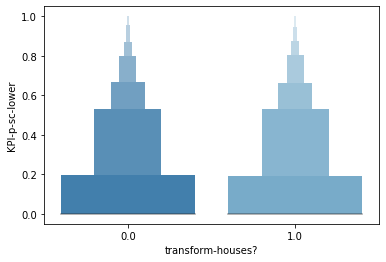

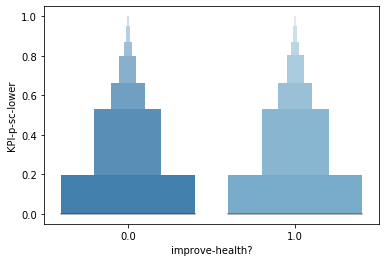

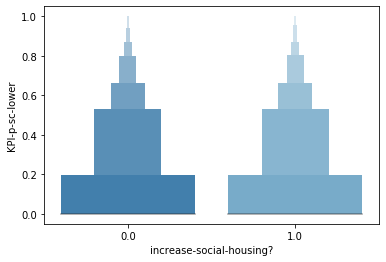

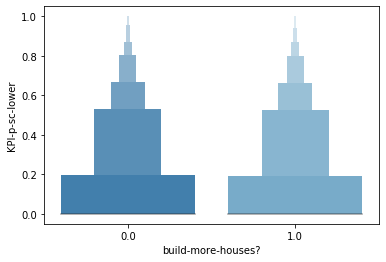

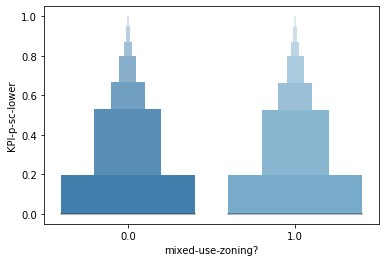

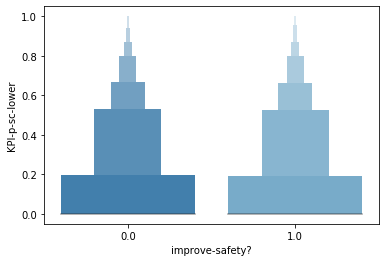

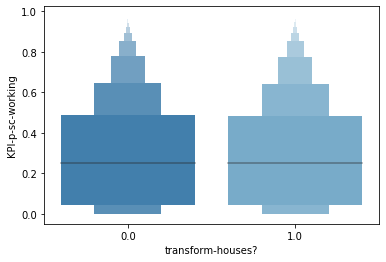

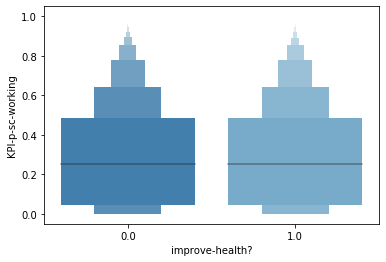

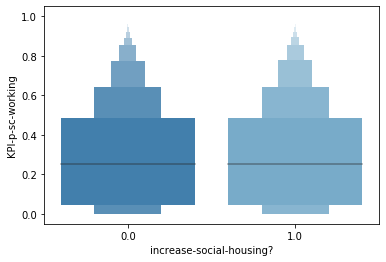

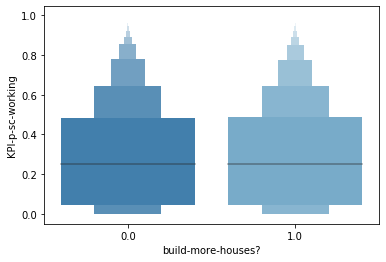

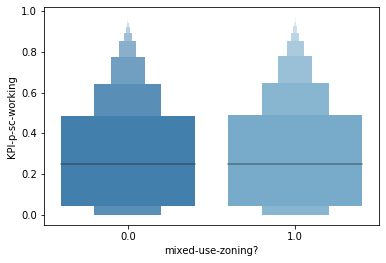

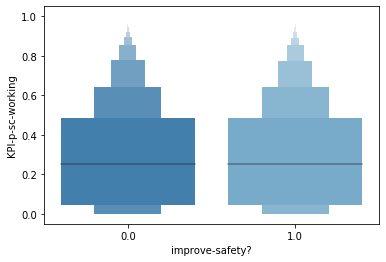

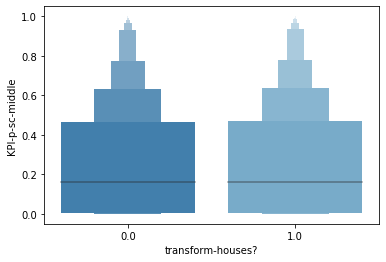

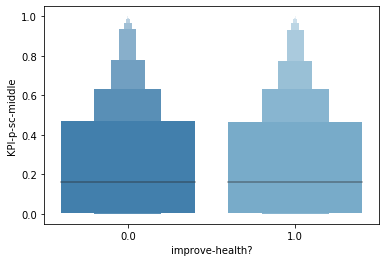

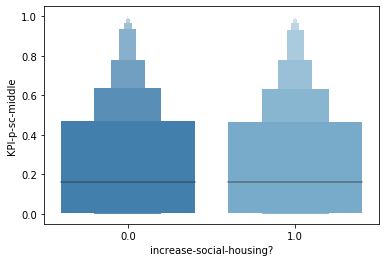

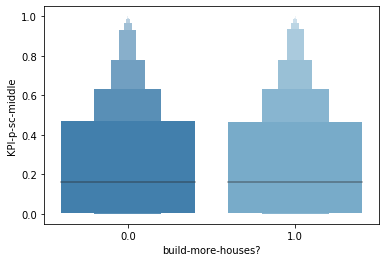

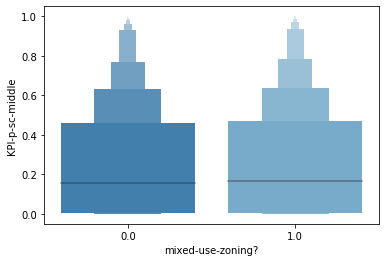

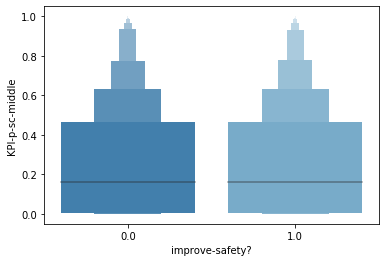

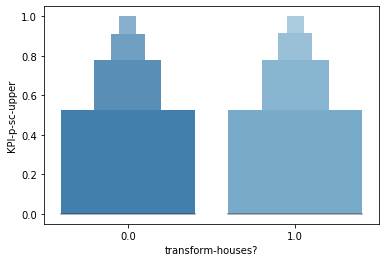

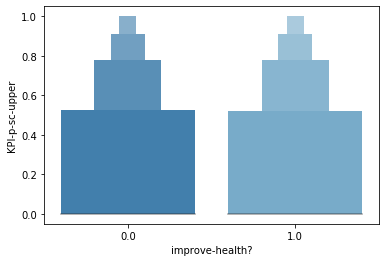

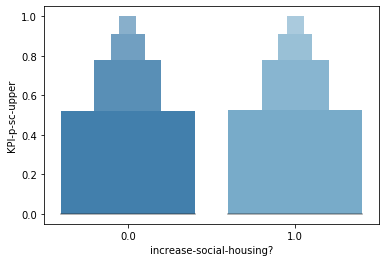

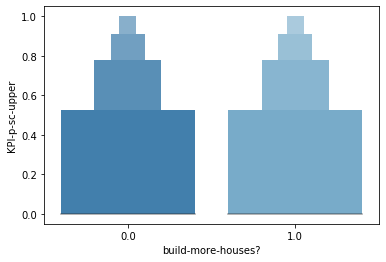

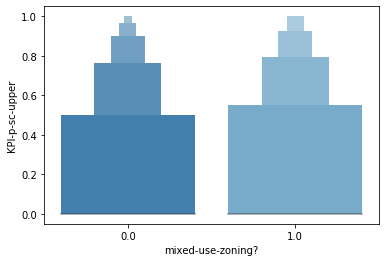

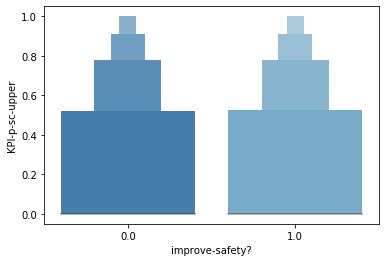

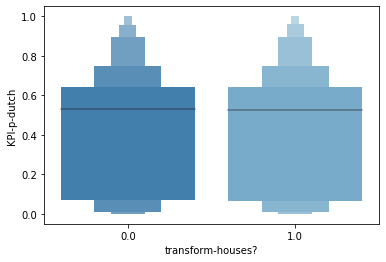

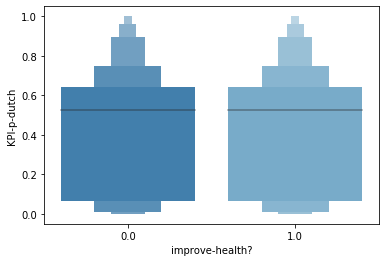

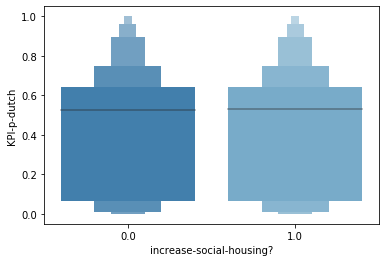

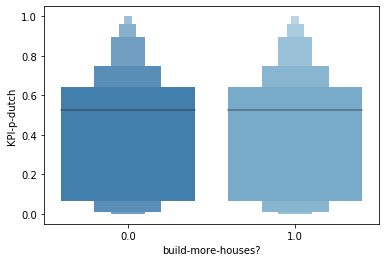

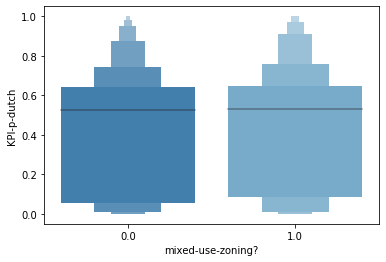

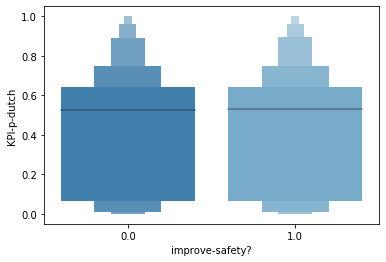

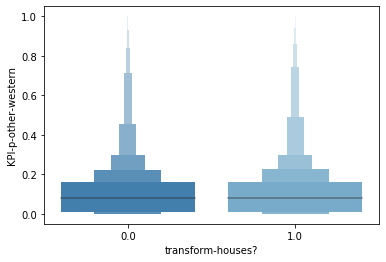

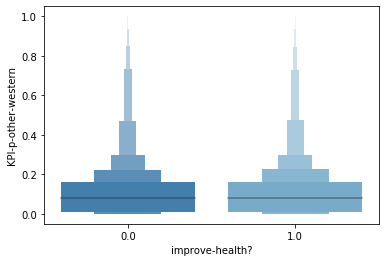

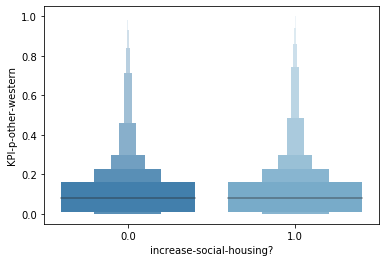

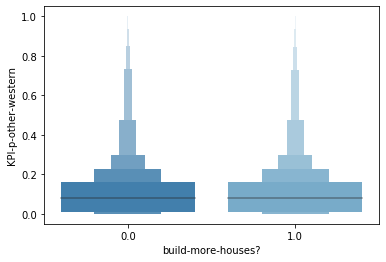

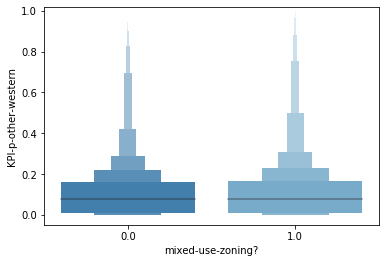

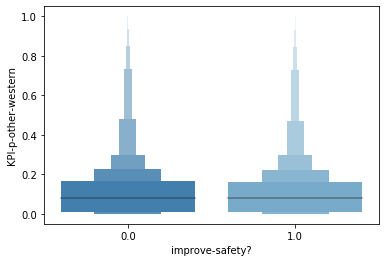

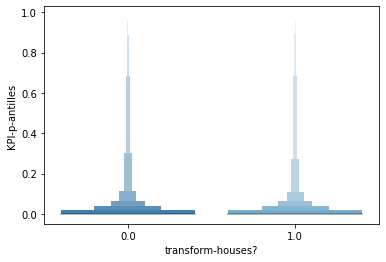

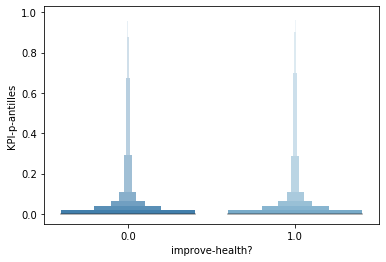

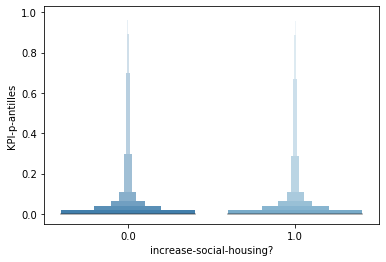

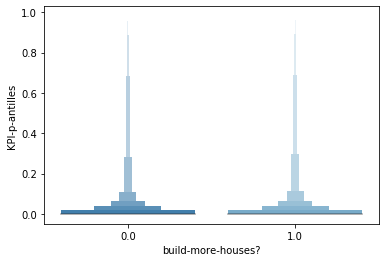

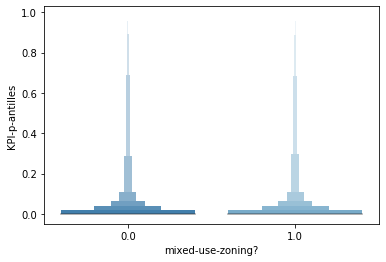

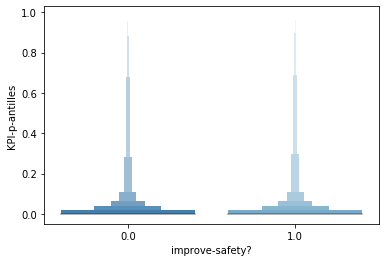

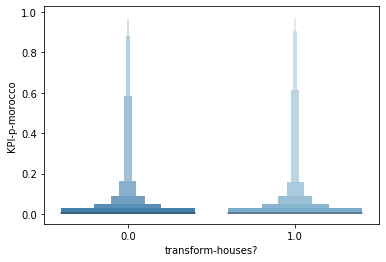

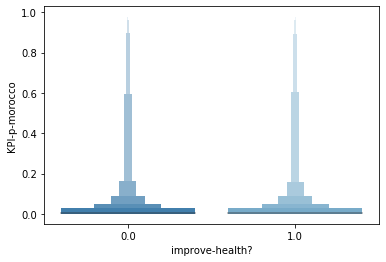

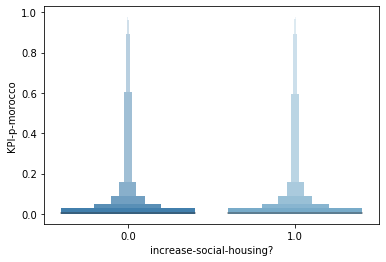

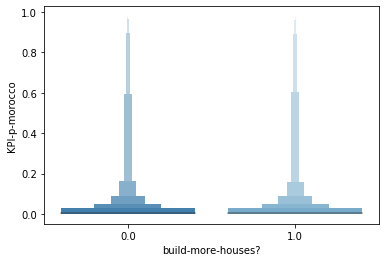

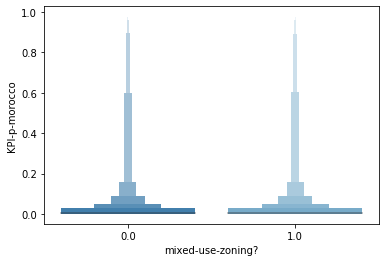

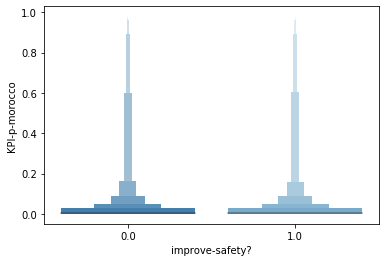

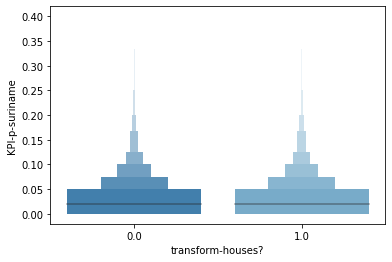

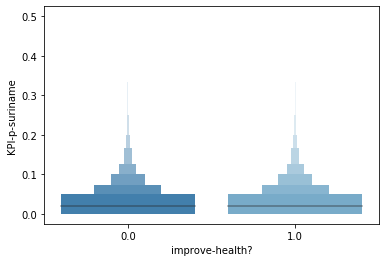

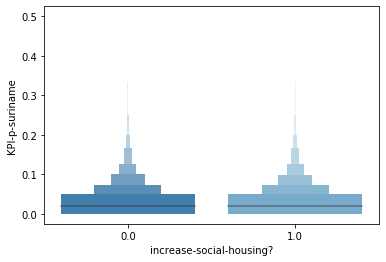

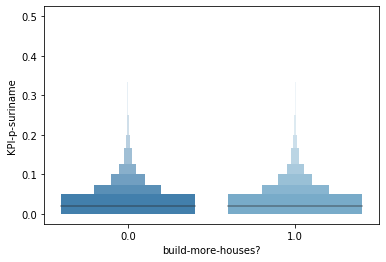

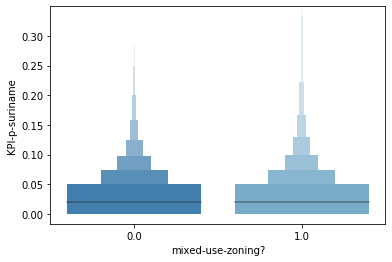

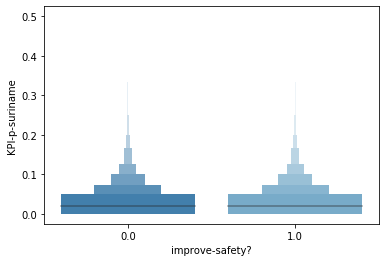

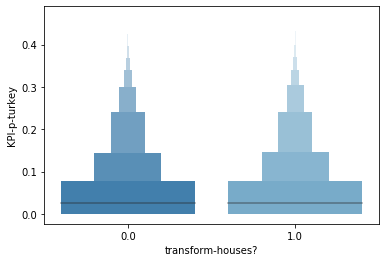

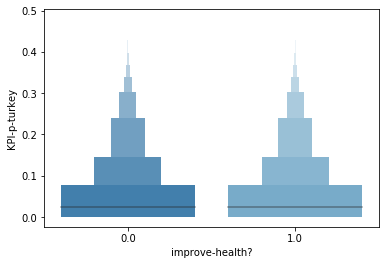

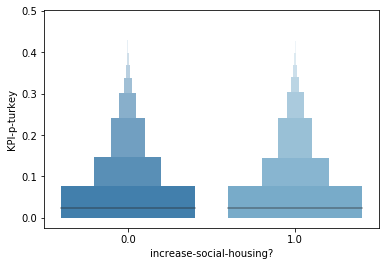

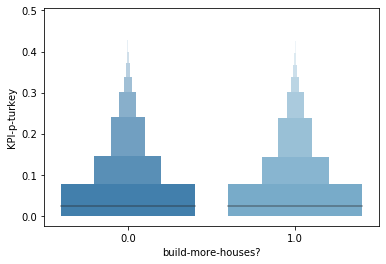

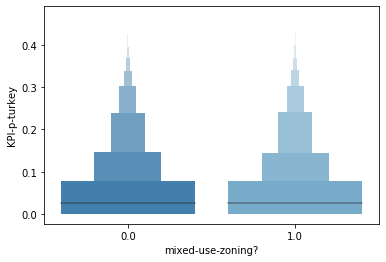

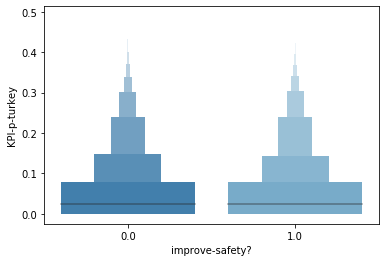

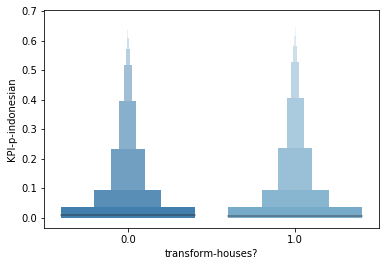

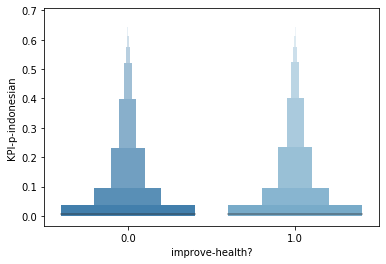

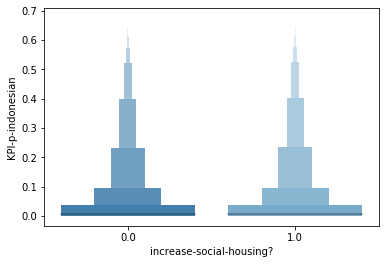

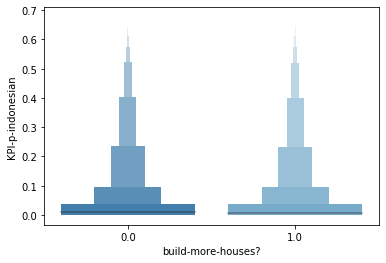

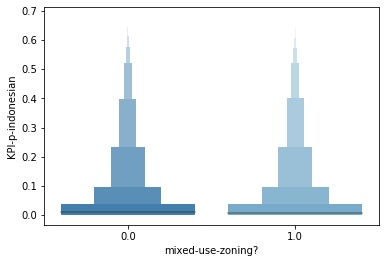

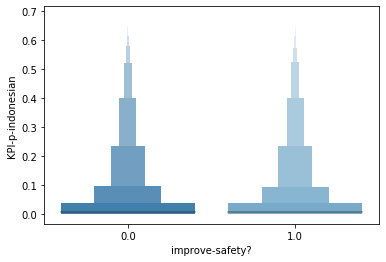

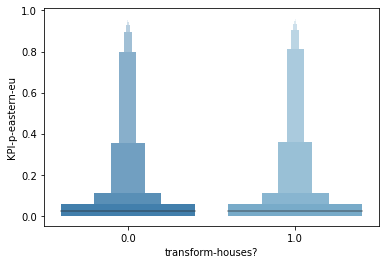

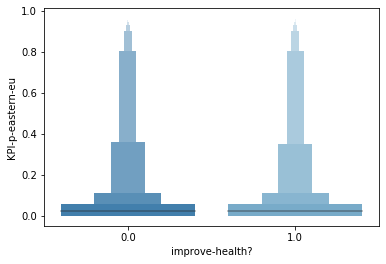

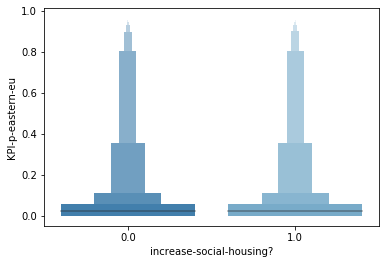

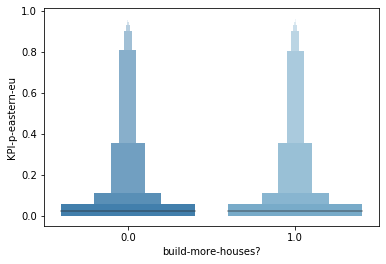

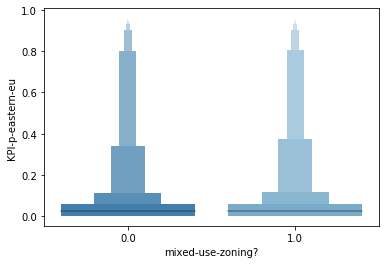

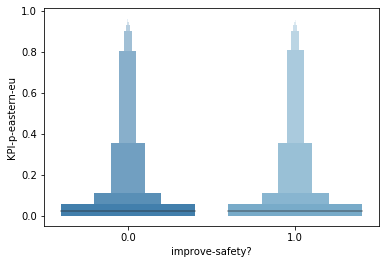

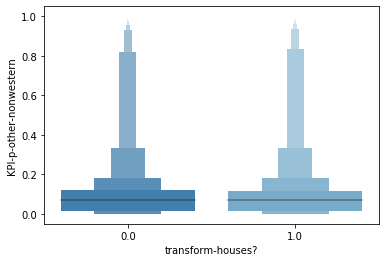

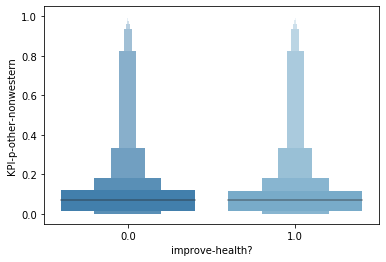

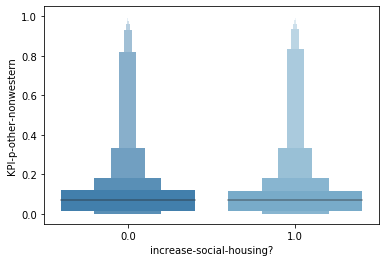

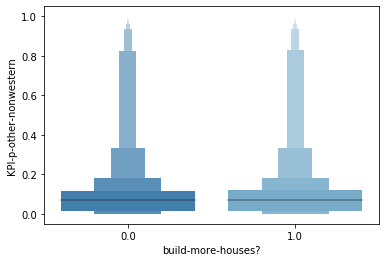

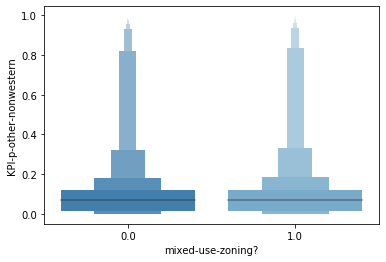

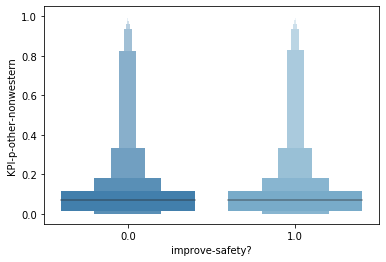

In [8]:
for KPI in df.columns:
    for lever in ['transform-houses?', 'improve-health?',
       'increase-social-housing?', 'build-more-houses?', 'mixed-use-zoning?',
       'improve-safety?']:
        plt.figure()
        sns.boxenplot(x=lever,y=KPI,palette="tab20c",data=df[df["[step]"]==40].astype(float),showfliers = False)
        #plt.savefig("output/images/sensitivity_aggregation_"+KPI+".png")
        plt.show()

In [3]:
baseline = df[(df["transform-houses?"]==False) & (df["improve-health?"]==False) & (df["increase-social-housing?"]==False) & (df["build-more-houses?"]==False) & (df["mixed-use-zoning?"]==False) & (df["improve-safety?"]==False)].assign(x="Base")
L1 = df[df["transform-houses?"]==True].assign(x="L1")
L2 = df[df["improve-health?"]==True].assign(x="L2")
L3 = df[df["increase-social-housing?"]==True].assign(x="L3")
L4 = df[df["build-more-houses?"]==True].assign(x="L4")
L5 = df[df["mixed-use-zoning?"]==True].assign(x="L5")
L6 = df[df["improve-safety?"]==True].assign(x="L6")

In [29]:
combined_df = pd.concat([baseline,L1,L2,L3,L4,L5,L6])

In [66]:
other_df = combined_df[combined_df["[step]"]==40][combined_df.columns[8:]]

In [67]:
other_df = other_df.drop(columns=['KPI-p-dutch',
       'KPI-p-other-western', 'KPI-p-antilles', 'KPI-p-morocco',
       'KPI-p-suriname', 'KPI-p-turkey', 'KPI-p-indonesian',
       'KPI-p-eastern-eu', 'KPI-p-other-nonwestern'])

In [70]:
other_df

,KPI-homeless,KPI-homeless-migrants,Neighborhood number,KPI-available_buy_houses,KPI-available_part_rent_houses,KPI-available_social_rent_houses,KPI-avg_income,KPI-avg_price,KPI-avg_utility,KPI-citizen-count,KPI-p-sc-lower,KPI-p-sc-working,KPI-p-sc-middle,KPI-p-sc-upper,x
9223056,287.0,238.0,78.0,0.0,0.0,0.0,80579.0,754536.0,1.107,54.0,0.000,0.000,0.056,0.944,Base
9223057,287.0,238.0,35.0,242.0,172.0,0.0,23638.0,221642.0,0.147,69.0,0.362,0.536,0.101,0.001,Base
9223058,287.0,238.0,36.0,0.0,0.0,0.0,22886.0,213984.0,0.647,1.0,1.000,0.000,0.000,0.000,Base
9223059,287.0,238.0,54.0,224.0,99.0,134.0,29845.0,278957.0,0.244,58.0,0.000,0.569,0.431,0.000,Base
9223060,287.0,238.0,39.0,1.0,0.0,0.0,21208.0,198482.0,0.187,193.0,0.435,0.544,0.021,0.000,Base
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9222367,8.0,3.0,15.0,0.0,1.0,1.0,19130.0,178622.0,0.303,1062.0,0.607,0.393,0.000,0.000,L6
9222368,8.0,3.0,40.0,2.0,0.0,0.0,22622.0,212441.0,0.514,592.0,0.461,0.502,0.037,0.000,L6
9222369,8.0,3.0,12.0,110.0,154.0,39.0,55274.0,516597.0,-0.598,78.0,0.000,0.026,0.885,0.089,L6
9222370,8.0,3.0,68.0,15.0,1.0,0.0,92485.0,864735.0,0.563,7.0,0.000,0.000,0.143,0.857,L6


In [25]:
ethnicity_df = combined_df[combined_df["[step]"]==40][['KPI-p-dutch','KPI-p-other-western', 'KPI-p-antilles', 'KPI-p-morocco','KPI-p-suriname', 'KPI-p-turkey', 'KPI-p-indonesian','KPI-p-eastern-eu', 'KPI-p-other-nonwestern', 'x']]

In [35]:
melted_ethnicity_df = pd.melt(ethnicity_df, id_vars="x", var_name="KPI", value_name="value")

In [72]:
melted_other_df = pd.melt(other_df, id_vars="x", var_name="KPI", value_name="value")

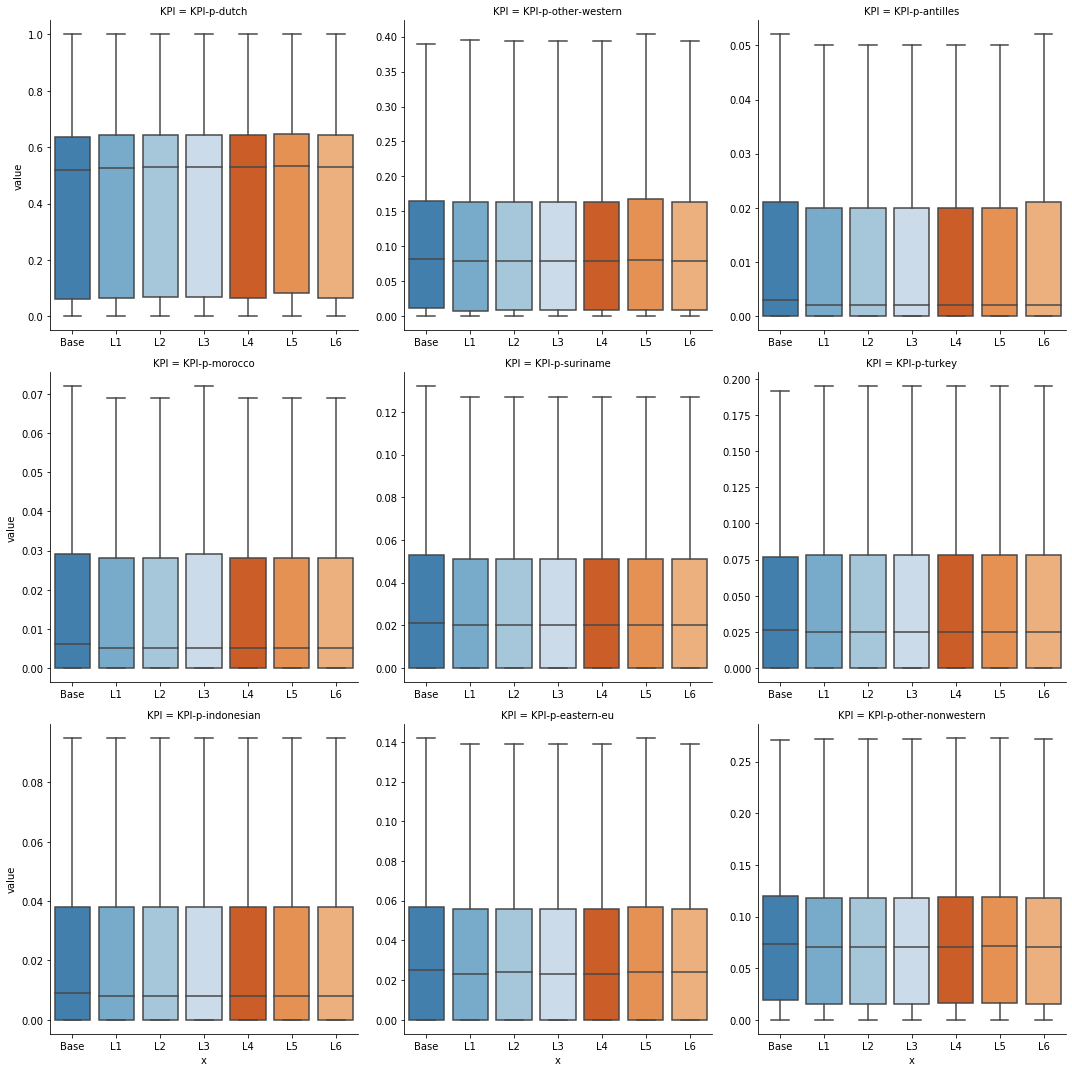

In [81]:
sns.catplot(x="x",y="value",col="KPI",data=melted_ethnicity_df,kind="box",palette="tab20c",col_wrap=3,showfliers = False,sharey=False,sharex=False)

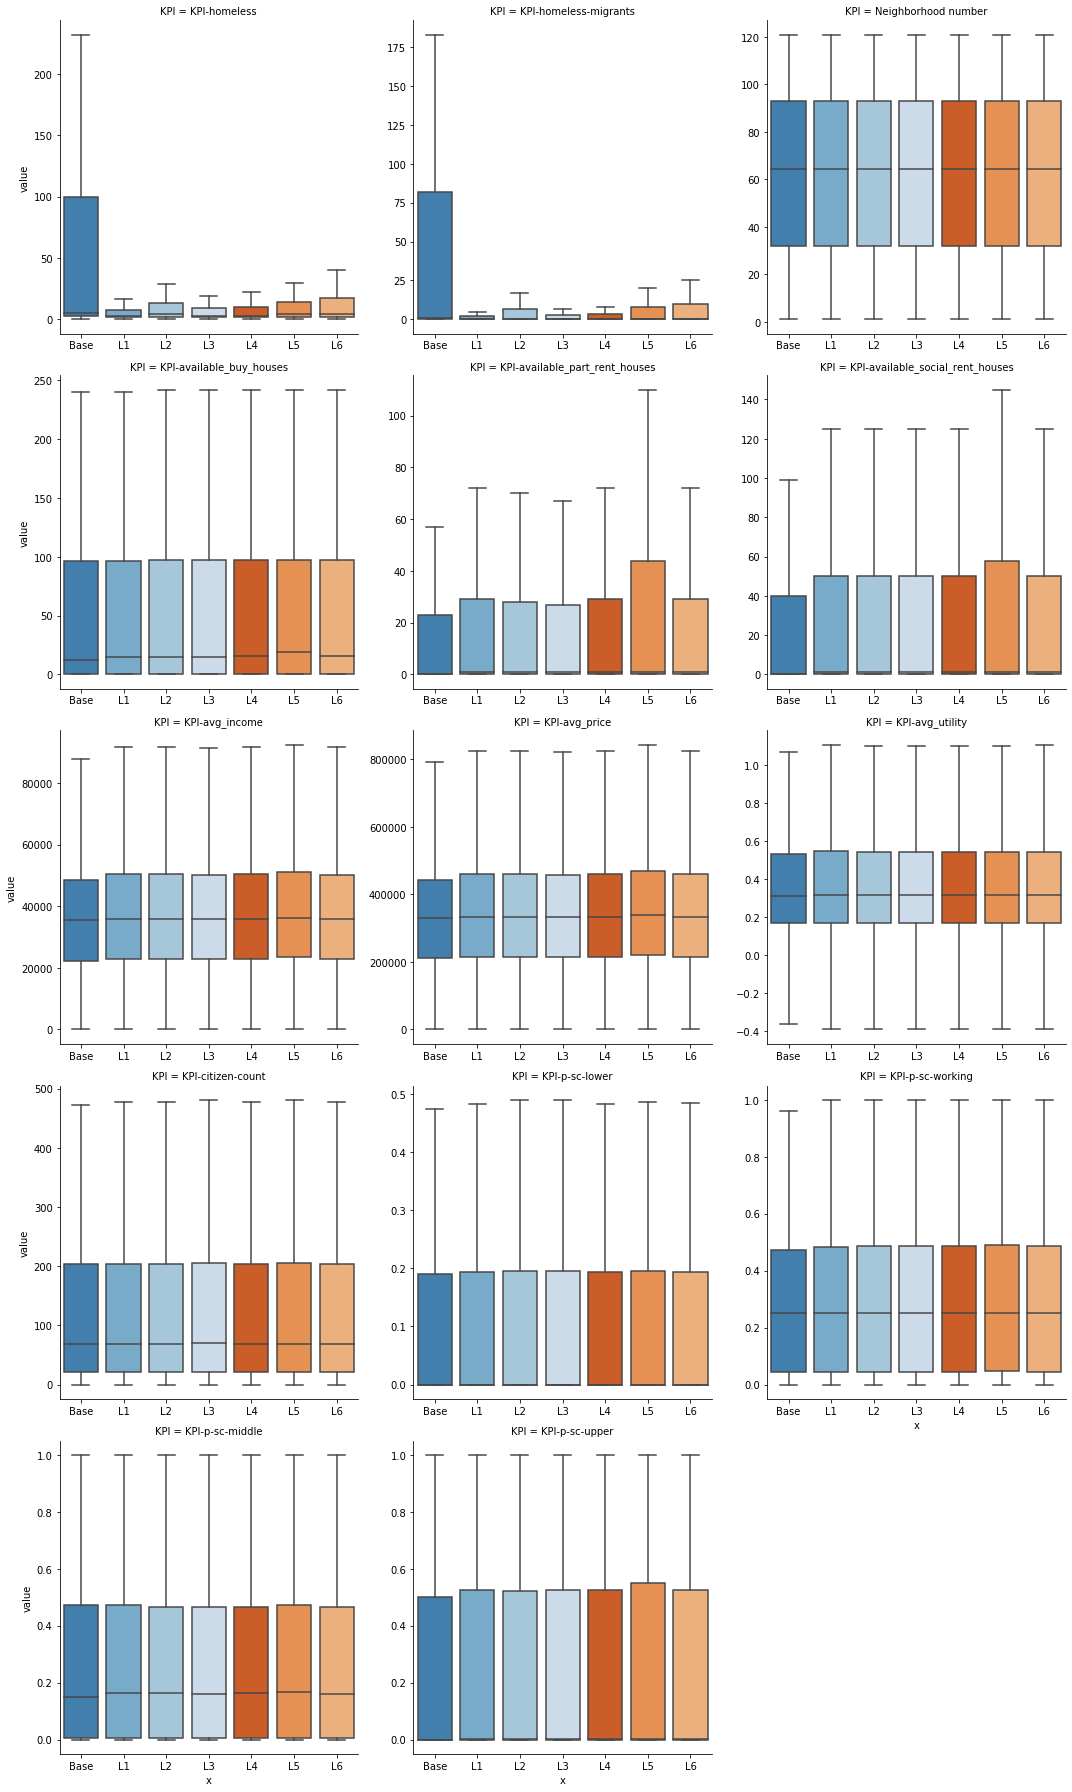

In [80]:
sns.catplot(x="x",y="value",col="KPI",data=melted_other_df,kind="box",palette="tab20c",col_wrap=3,showfliers = False,sharey=False,sharex=False)